<a href="https://colab.research.google.com/github/rubuntu/uaa-417-sistemas-de-gestion-de-bases-de-datos-avanzados/blob/main/ML01_Intro_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# %matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Introducción al Aprendizaje Automático (Machine Learning)

¿Qué significa aprender? Aprender es un proceso donde tomamos una serie de observaciones y
sacamos conclusiones basadas en experiencias pasadas. Por ejemplo, podemos aprender a reconocer
patrones en datos de experiencia, como: cuando tomo el autobús más tarde, llego tarde al trabajo.
El Aprendizaje Automático (Machine Learning) ocurre cuando enseñamos a una computadora a hacer lo
mismo: encontrar patrones en los datos. La idea es que los humanos son muy buenos para encontrar
patrones, pero relativamente lentos al revisar grandes cantidades de datos. Las computadoras
necesitan ser entrenadas para encontrar los patrones, pero pueden procesar datos (archivos CSV,
imágenes, etc.) increíblemente rápido.

La revolución del Machine Learning tiene sus raíces en dos factores principales:

1. Una enorme cantidad de datos recientemente generados
2. Una gran mejora en la memoria y el rendimiento de las computadoras

Si queremos aprovechar el aprendizaje automático, necesitamos aprender a enseñar a las computadoras
a reconocer patrones y aprovechar esa habilidad para resolver problemas del mundo real. Empecemos
con un ejemplo muy simple.

Supongamos que tenemos datos unidimensionales dados por una sola característica X y un conjunto
correspondiente de etiquetas y. Queremos modelar estos datos, así que crearemos una relación
f(X) ≈ y. Esta función f representará nuestro modelo. Generaremos los datos eligiendo aleatoriamente
un exponente para una tendencia y agregando algo de ruido aleatorio. Creamos los datos y vemos cómo se ve.

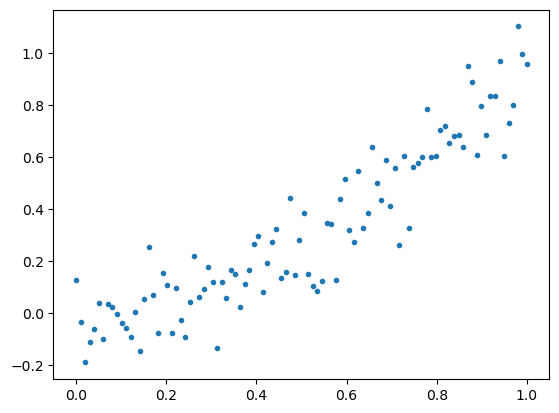

In [ ]:
X = np.linspace(0, 1, 100)
exp = np.random.choice([2, 3])
y = X**exp + np.random.randn(X.shape[0])/10
plt.plot(X, y, '.')


Ahora generaremos la relación predictiva usando uno de los métodos más simples: ajustar una recta
a los datos.

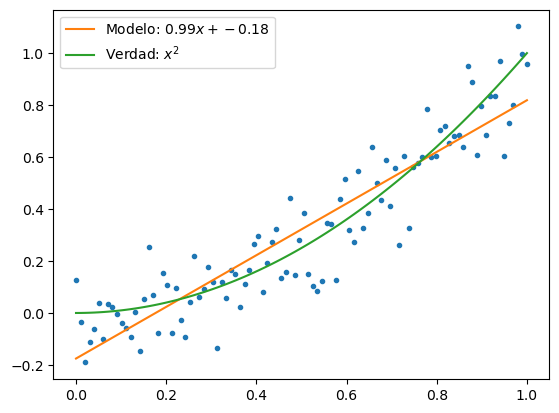

In [ ]:
p = np.polyfit(X, y, 1)
z = np.poly1d(p)
plt.plot(X, y, '.')
plt.plot(X, z(X), label=r"Modelo: ${:.2f}x + {:.2f}$".format(*p))
plt.plot(X, X**exp, label=r'Verdad: $x^{}$'.format(exp))
plt.legend()


Ahora tenemos un modelo para estos datos, aprendido por la computadora: dado un valor (o varios)
de X podemos predecir la salida. En el contexto de Machine Learning, esto se llama Regresión
Lineal y es un método bastante potente y general para aprender. Solo este ejemplo abre muchas
preguntas que responderemos más adelante:

1. ¿Qué tan bueno es el modelo?
2. ¿Podemos añadir flexibilidad al modelo?
3. ¿El modelo generaliza?
4. ¿Qué nos enseña este modelo sobre los datos?

Empecemos con la pregunta 4, que en muchos sentidos es la más importante. Para este modelo simple
podemos ver que el vector de etiquetas y tiene una correlación positiva con las características X.

Normalmente, el objetivo del aprendizaje automático es doble:

1. Entender los datos que ya tenemos
2. Usar ese entendimiento para hacer predicciones sobre datos sin etiquetar

El aprendizaje automático cae en dos clases: **supervisado** y **no supervisado**. En aprendizaje
supervisado intentamos aprender una relación predictiva entre **características** de nuestros datos
y alguna etiqueta de salida. En aprendizaje no supervisado queremos encontrar tendencias en nuestras
características sin usar etiquetas objetivo. El aprendizaje no supervisado suele apoyarse en reducir
la dimensionalidad de los datos.

Un ejemplo humano de aprendizaje supervisado sería tomar prestados libros de una biblioteca sobre
matemáticas y geografía. Al leer diferentes libros de cada tema, aprendemos qué símbolos, imágenes
y palabras se asocian con matemáticas y cuáles con geografía. Una tarea no supervisada similar
sería tomar prestados muchos libros sin conocer su tema. Podemos ver que algunos libros contienen
imágenes similares (mapas) y otros contienen símbolos similares (por ejemplo, las letras griegas Σ
y π). Decimos que los libros que contienen mapas son similares y que son diferentes de los que
contienen letras griegas. Crucialmente, _no sabemos de qué tratan los libros, solo que son
similares o diferentes_.

Primero hablemos de aprendizaje supervisado, ya que ahí pasaremos la mayor parte del tiempo.

Formalmente, el problema de aprendizaje supervisado puede plantearse así: dada una matriz X de
dimensiones n × p, crear una relación predictiva (o función) f(X) donde f(X) ≈ y, siendo y un
vector de dimensión n. A X se le llama **matriz de características** y a y **etiquetas**.

El objetivo general del aprendizaje supervisado es aplicar luego este modelo a datos sin etiquetar
para los que podamos construir una matriz de características representativa de la original. ¡Esto
nos permite hacer predicciones!

Por supuesto, el aprendizaje automático es solo una herramienta que debe aplicarse con cuidado y
reflexión. No es la solución ideal para cada problema. Veamos algunos de los inconvenientes que
podríamos encontrar.

# Dificultades del Aprendizaje Automático

Los modelos pueden estar fuertemente sesgados y, por lo tanto, no ser lo suficientemente flexibles
para manejar la generalización. Grafiquemos nuestra función original en un rango más amplio y usemos
el modelo anterior.

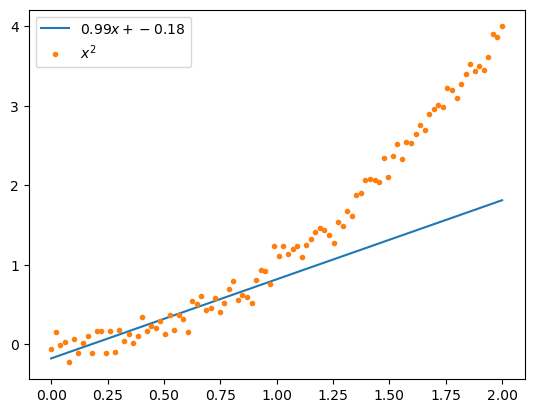

In [ ]:
X = np.linspace(0, 2, 100)
y = X**exp + np.random.randn(X.shape[0])/10
plt.plot(X, z(X), label=r"${:.2f}x + {:.2f}$".format(*p))
plt.plot(X, y,'.', label=r'$x^{}$'.format(exp))
plt.legend()


El modelo funciona bastante bien en el rango sobre el cual inicialmente consideramos nuestros datos,
pero podemos ver que no generalizará bien a características fuera del rango que consideramos. Este
es un problema general; debemos asegurarnos de que nuestros datos de entrenamiento contengan una
distribución bien muestreada sobre la cual esperamos hacer predicciones (o tener algún conocimiento
previo que nos diga que podemos extrapolar más allá del dominio de nuestros datos de entrenamiento).
El aprendizaje automático encuentra patrones en los datos que ya ha visto y no siempre puede hacer
buenas predicciones en datos que no ha visto.

Intentemos arreglar esto añadiendo más parámetros al modelo.

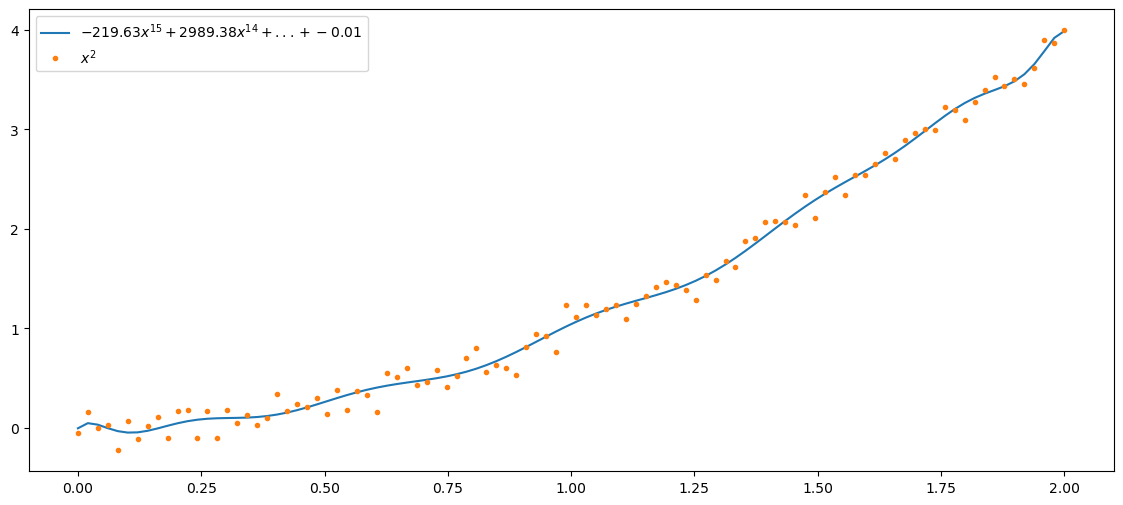

In [ ]:
p = np.polyfit(X, y, 15)
z = np.poly1d(p)
plt.figure(figsize=[14, 6])
plt.plot(X, z(X), label=r"${:.2f}x^{{15}} + {:.2f}x^{{14}} + ... + {:.2f}$".format(*p[[0, 1, -1]]))
plt.plot(X, y,'.', label=r'$x^{}$'.format(exp))
plt.legend()


¡Vaya, parece un ajuste perfecto! ¿Demasiado bueno? Parece que el modelo está ajustando pequeñas
ondulaciones en los datos que sabemos que no son reales (los datos reales se derivan de un exponente
simple). Intentemos generalizar de nuevo.

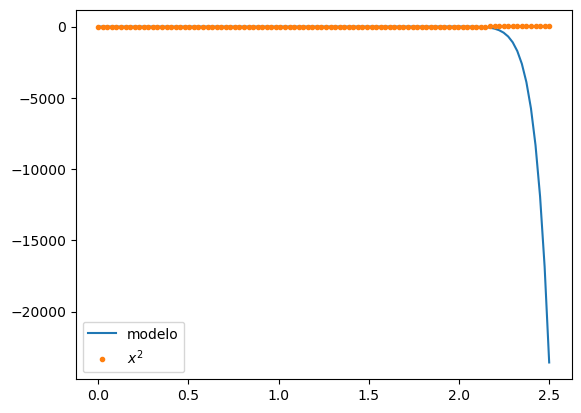

In [ ]:
X = np.linspace(0, 2.5, 100)
y = X**exp + np.random.randn(X.shape[0])/10
plt.plot(X, z(X), label=r"modelo")
plt.plot(X, y,'.', label=r'$x^{}$'.format(exp))
plt.legend()


¡Otra vez vaya! Eso es bastante malo. Este es un ejemplo de **sobreajuste** (overfitting), donde
hemos permitido demasiada flexibilidad al modelo y este ha ajustado el ruido en los datos, lo cual
no es generalizable.

Aprenderemos más sobre cómo combatir estos problemas, pero la idea es que debemos tener cuidado al
elegir el modelo que queremos usar y los **hiperparámetros** (en este caso, el orden del polinomio)
para dicho modelo.

# Scikit-Learn

Para realizar aprendizaje automático usaremos el paquete `scikit-learn`, que ofrece una interfaz
unificada basada en clases para diferentes modelos y utilidades de aprendizaje automático.
`Scikit-learn` se basa en la idea de una clase `Estimator` que implementa los métodos necesarios
para el aprendizaje automático.

Cada objeto estimador implementará un método `fit` que acepta como argumentos una matriz de
características `X` y un vector de etiquetas `y`, así como un método `predict` que acepta como
argumento una matriz de características `X`. Veamos un ejemplo.

Primero debemos importar el estimador que queremos, en este caso `LinearRegression` (solo debemos
hacerlo una vez por espacio de nombres; es simplemente una clase de Python).

In [ ]:
from sklearn.linear_model import LinearRegression


Ahora podemos instanciar esta clase y pasar cualquier hiperparámetro en la creación.

In [ ]:
lr = LinearRegression(fit_intercept=True)
lr

LinearRegression()

El hiperparámetro **`fit_intercept=True`** en `LinearRegression` controla si el modelo debe **ajustar un término de intercepto (también llamado “sesgo” o “bias”)** al entrenar.

---

### 📌 En detalle:

* **Si `fit_intercept=True` (por defecto):**
  El modelo estima no solo los coeficientes de las variables (`β₁, β₂, …`), sino también un término adicional `β₀` (intercepto).
  La ecuación queda así:

  $$
  y = β_0 + β_1 x_1 + β_2 x_2 + \dots + β_n x_n
  $$

  Esto permite que la recta o hiperplano **no esté forzado a pasar por el origen (0,0,…)**, sino que se ajuste mejor a los datos.

---

* **Si `fit_intercept=False`:**
  El modelo **no incluye el intercepto**, por lo que se asume que los datos ya están centrados.
  La ecuación se reduce a:

  $$
  y = β_1 x_1 + β_2 x_2 + \dots + β_n x_n
  $$

  Esto obliga a que la regresión pase por el origen. Puede ser útil si ya has **preprocesado tus datos** (por ejemplo, restando la media de cada variable, o si sabes que el valor real en `x=0` debe dar `y=0`).

---

👉 En la práctica, casi siempre se usa **`fit_intercept=True`**, salvo que los datos estén **ya normalizados/centrados** o que sepas de antemano que el modelo debe pasar por el origen.



Ahora podemos usar este objeto para ajustar nuestros datos anteriores. Usaremos el método `fit`
para hacerlo. Necesitaremos cambiar la forma del vector `X` para que sea una matriz de
características de una sola columna en lugar de un vector unidimensional.

In [ ]:
lr.fit(X.reshape(-1, 1), y)

LinearRegression()


El método `fit` realizará el ajuste y guardará los parámetros ajustados dentro del estado del objeto.
Podemos verlos si queremos.

In [ ]:
lr.coef_, lr.intercept_

(array([2.48854325]), -1.0177669916343706)


Guardar los parámetros dentro de la instancia es extremadamente útil, ya que nos permite serializar
(pickle) todo el objeto y conservar los parámetros dentro del propio modelo.

Por último, podemos usar el método `predict` para hacer predicciones.

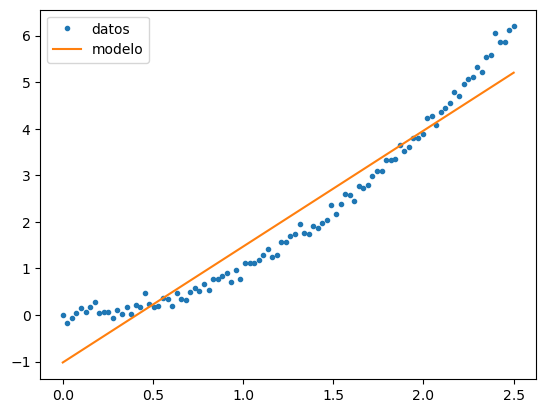

In [ ]:
predictions = lr.predict(X.reshape(-1, 1))
plt.plot(X, y, '.', label='datos')
plt.plot(X, predictions, label='modelo')
plt.legend()


Exploraremos los modelos lineales en más detalle en otra lección, pero si queremos mejorar este
modelo, necesitaremos diseñar mejores características. Para asomarnos a dónde vamos, usemos más
herramientas de `scikit-learn`.

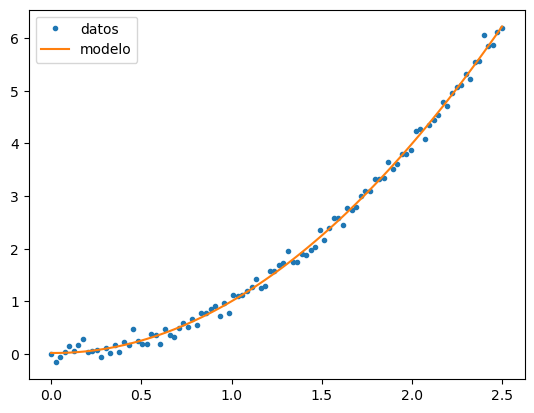

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline([
    ('polynomial_transform', PolynomialFeatures(3)),
    ('linear_fit', LinearRegression())
])

pipe.fit(X.reshape(-1, 1), y)

predictions = pipe.predict(X.reshape(-1, 1))
plt.plot(X, y, '.', label='datos')
plt.plot(X, predictions, label='modelo')
plt.legend()


¿Esto generaliza?

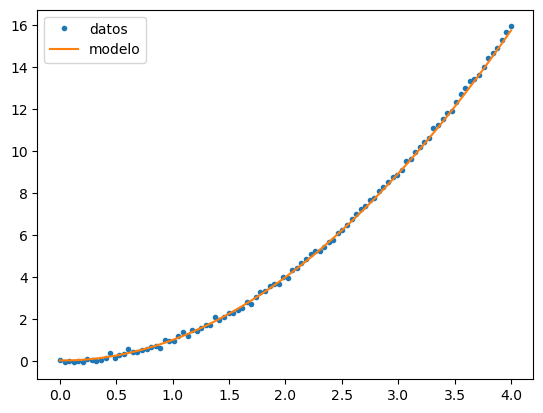

In [ ]:
X = np.linspace(0, 4, 100)
y = X**exp + np.random.randn(X.shape[0])/10
predictions = pipe.predict(X.reshape(-1, 1))
plt.plot(X, y, '.', label='datos')
plt.plot(X, predictions, label='modelo')
plt.legend()